<a href="https://colab.research.google.com/github/keidakira/machine-learning-ucf/blob/main/ML_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install surprise

     |████████████████████████████████| 11.8MB 319kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617553 sha256=1098ac6401f94c5e7b6f63bb99569df87eb2466ef3408e0305e1f1fe978251ca
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [66]:
import pandas as pd
import numpy as np
from surprise import KNNBasic,Reader, Dataset, SVD
from surprise.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt

**3.a Loading the data**

In [6]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)
data = Dataset.load_from_file('./ratings_small.csv', reader=reader)

**3.c Probabilistic Matrix Factorization (PMF)**

In [93]:
pmf_svd = SVD()
cv_pmf = cross_validate(pmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8988  0.8887  0.8976  0.9001  0.8972  0.8965  0.0040  
MAE (testset)     0.6901  0.6867  0.6923  0.6907  0.6886  0.6897  0.0019  
Fit time          4.77    4.64    4.56    4.54    4.65    4.63    0.08    
Test time         0.16    0.17    0.30    0.15    0.32    0.22    0.08    


**3.c User based CF**

In [15]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9650  0.9703  0.9597  0.9697  0.9711  0.9671  0.0043  
MAE (testset)     0.7401  0.7455  0.7394  0.7456  0.7478  0.7437  0.0033  
Fit time          0.11    0.15    0.15    0.16    0.15    0.14    0.02    
Test time         1.72    1.67    1.78    1.75    1.70    1.73    0.04    


**3.c Item based CF**

In [16]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9352  0.9288  0.9386  0.9353  0.9381  0.9352  0.0035  
MAE (testset)     0.7207  0.7157  0.7233  0.7233  0.7221  0.7210  0.0028  
Fit time          4.32    4.34    3.74    3.85    3.77    4.00    0.27    
Test time         7.12    7.17    7.45    7.14    7.09    7.19    0.13    


**3.d Mean of PMF, User based CF, Item based CF with respect to MAE, RMSE**

In [38]:
pmf = ('PMF', cv_pmf['test_mae'].mean(), cv_pmf['test_rmse'].mean())
user_cf = ('User based CF', cv_ub['test_mae'].mean(), cv_ub['test_rmse'].mean())
item_cf = ('Item based CF', cv_ib['test_mae'].mean(), cv_ib['test_rmse'].mean())

results = [pmf, user_cf, item_cf]

print("%-12s %12s %12s" % ('Algorithm', 'MAE Mean', 'RMSE Mean'))

for res in results:
  if res[0] == 'PMF':
    print("%-8s %14.3f %12.3f" % (res[0], res[1], res[2]))
  else:
    print("%-8s %9.3f %12.3f" % (res[0], res[1], res[2]))

Algorithm        MAE Mean    RMSE Mean
PMF               0.778        1.007
User based CF     0.744        0.967
Item based CF     0.721        0.935


**3.e Similarities Comparision**

In [45]:
similarities = ['cosine', 'msd', 'pearson']
measures = ['RMSE', 'MAE']
run_results = {
    'ucf': dict(),
    'icf': dict()
}

for similarity in similarities:
  user_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': True})
  item_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': False})

  print(f"Calculating {similarity} for User Based CF")
  cross_validate_user_based_cf = cross_validate(user_based_cf, data, measures, verbose=True, cv=5)

  print(f"Calculating {similarity} for Item Based CF")
  cross_validate_item_based_cf = cross_validate(item_based_cf, data, measures, verbose=True, cv=5)

  run_results['ucf'][similarity] = cross_validate_user_based_cf
  run_results['icf'][similarity] = cross_validate_item_based_cf

Calculating cosine for User Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9932  0.9944  0.9993  0.9878  0.9918  0.9933  0.0038  
MAE (testset)     0.7667  0.7674  0.7720  0.7645  0.7676  0.7677  0.0024  
Fit time          0.38    0.39    0.39    0.40    0.38    0.39    0.01    
Test time         1.88    1.71    1.83    1.73    1.79    1.79    0.06    
Calculating cosine for Item Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

In [71]:
plot_data = {
    'mae': {
      'cosine': [],
      'msd': [],
      'pearson': []
    },
    'rmse': {
      'cosine': [],
      'msd': [],
      'pearson': []
    }
}

for k, v in run_results.items():
  for key, result in run_results[k].items():
    plot_data['mae'][key].append(result['test_mae'].mean())
    plot_data['rmse'][key].append(result['test_rmse'].mean())

In [72]:
plot_data

{'mae': {'cosine': [0.7676587629870264, 0.7745025746926022],
  'msd': [0.7441687361188356, 0.7209702950256605],
  'pearson': [0.7725258101616669, 0.7684868602487277]},
 'rmse': {'cosine': [0.9932900883240734, 0.9951171397547679],
  'msd': [0.9682372978723197, 0.9345415229074423],
  'pearson': [0.998863116051106, 0.9898522272861013]}}

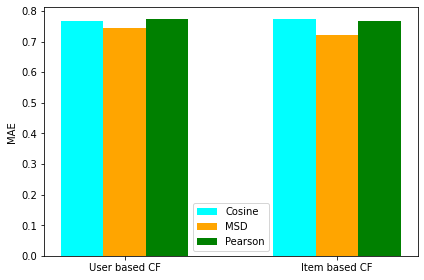

In [91]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['mae']['cosine'], width, color='cyan')
plt.bar(x, plot_data['mae']['msd'], width, color='orange')
plt.bar(x+0.2, plot_data['mae']['pearson'], width, color='green')

plt.xticks(x, labels)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.tight_layout()

plt.show()

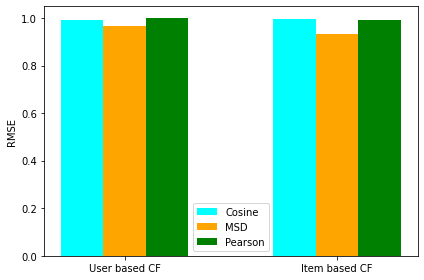

In [92]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['rmse']['cosine'], width, color='cyan')
plt.bar(x, plot_data['rmse']['msd'], width, color='orange')
plt.bar(x+0.2, plot_data['rmse']['pearson'], width, color='green')

plt.xticks(x, labels)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.tight_layout()

plt.show()

In [103]:
min_k_value = 1
mean = 99999
ucf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': True}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  ucf_k_results.append(curr_mean)
  print(i)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0549  1.0657  1.0558  1.0493  1.0646  1.0581  0.0062  
MAE (testset)     0.8465  0.8558  0.8482  0.8446  0.8540  0.8498  0.0043  
Fit time          0.13    0.16    0.16    0.15    0.16    0.15    0.01    
Test time         0.77    0.96    0.77    0.92    0.79    0.84    0.08    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [98]:
min_k_value = 1
mean = 99999
icf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': False}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  icf_k_results.append(curr_mean)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0544  1.0611  1.0590  1.0594  1.0565  1.0581  0.0023  
MAE (testset)     0.8476  0.8511  0.8512  0.8500  0.8490  0.8498  0.0014  
Fit time          4.60    4.76    3.95    3.98    4.29    4.31    0.32    
Test time         4.14    4.25    4.11    4.15    4.08    4.15    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

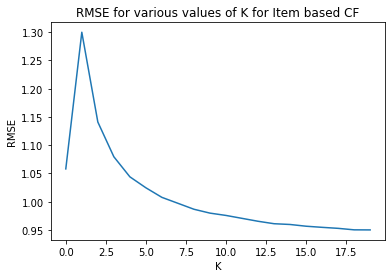

In [106]:
plt.plot(icf_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for Item based CF")
plt.show()

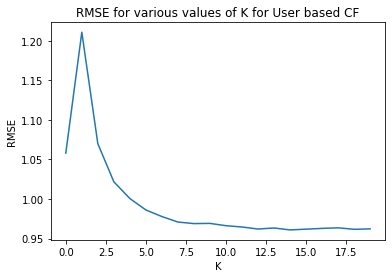

In [105]:
plt.plot(ucf_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF")
plt.show()

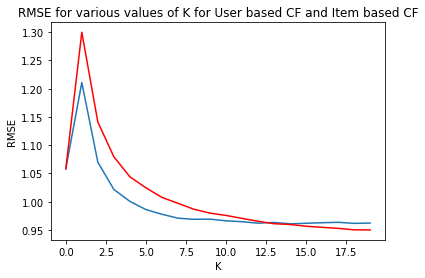

In [108]:
plt.plot(ucf_k_results)
plt.plot(icf_k_results, color='r')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF and Item based CF")
plt.show()